In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [2]:
# Create a list of expense categories
categories = ['Marketing', 'Operations', 'R&D', 'Salaries', 'Logistics', 'Technology']

# Create a list of regions
regions = ['North America', 'Europe', 'Asia', 'South America']

# Set the random seed for reproducibility
np.random.seed(42)

# Simulate historical data for 36 months (3 years)
months = pd.date_range(start="2018-01-01", periods=36, freq='M')

In [3]:
# Generate data for each month
data = []
for month in months:
    for category in categories:
        region = random.choice(regions)
        amount_spent = random.randint(10000, 50000)  # Simulate spend amount between 10k and 50k
        outcome = amount_spent * random.uniform(1.1, 2.5)  # Outcome (revenue or growth) is based on spending
        data.append([month, category, region, amount_spent, outcome])


In [4]:
# Create DataFrame
df_budget = pd.DataFrame(data, columns=['Date', 'Category', 'Region', 'Amount_Spent', 'Outcome'])

# Show first few rows of the dataset
print(df_budget)


          Date    Category         Region  Amount_Spent       Outcome
0   2018-01-31   Marketing           Asia         49752  58963.083203
1   2018-01-31  Operations  North America         20445  30745.934472
2   2018-01-31         R&D  North America         48212  93447.445426
3   2018-01-31    Salaries  North America         38052  82022.390920
4   2018-01-31   Logistics           Asia         46384  79191.902348
..         ...         ...            ...           ...           ...
211 2020-12-31  Operations           Asia         31516  66274.561252
212 2020-12-31         R&D  North America         30604  35308.592239
213 2020-12-31    Salaries           Asia         23098  55557.007869
214 2020-12-31   Logistics         Europe         48533  76471.616523
215 2020-12-31  Technology  South America         42950  66102.080294

[216 rows x 5 columns]


In [5]:
df_budget.describe()

,Amount_Spent,Outcome
count,216.000000,216.000000
mean,31160.453704,55421.206576
std,11627.183113,22884.544573
min,10074.000000,12491.787251
25%,21534.000000,36615.392066
50%,31130.500000,54139.349784
75%,41731.500000,72272.066856
max,49801.000000,107505.249713


In [6]:
df_budget.to_csv('budgeting_data.csv', index=False)


In [7]:
#  the plot style
sns.set(style="whitegrid")


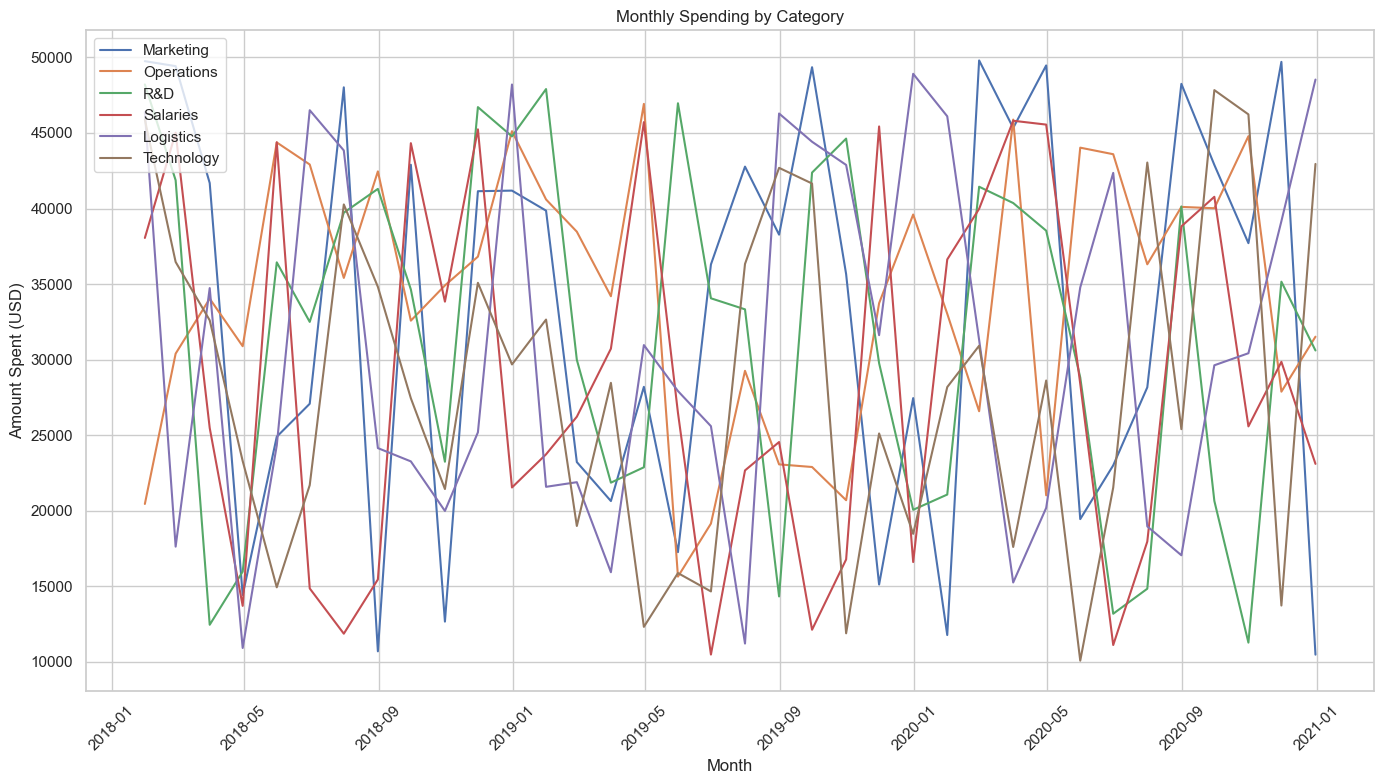

In [8]:
#  Monthly Spending by Category
plt.figure(figsize=(14, 8))
for category in df_budget['Category'].unique():
    category_data = df_budget[df_budget['Category'] == category]
    plt.plot(category_data['Date'], category_data['Amount_Spent'], label=category)

plt.title('Monthly Spending by Category')
plt.xlabel('Month')
plt.ylabel('Amount Spent (USD)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

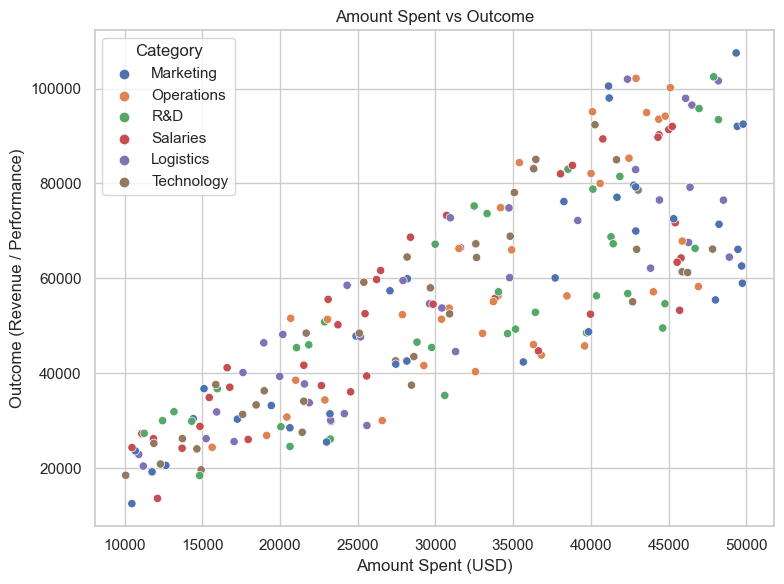

In [9]:
#Correlation between Amount Spent and Outcome (revenue, performance, etc.)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_budget, x='Amount_Spent', y='Outcome', hue='Category')
plt.title('Amount Spent vs Outcome')
plt.xlabel('Amount Spent (USD)')
plt.ylabel('Outcome (Revenue / Performance)')
plt.tight_layout()
plt.show()

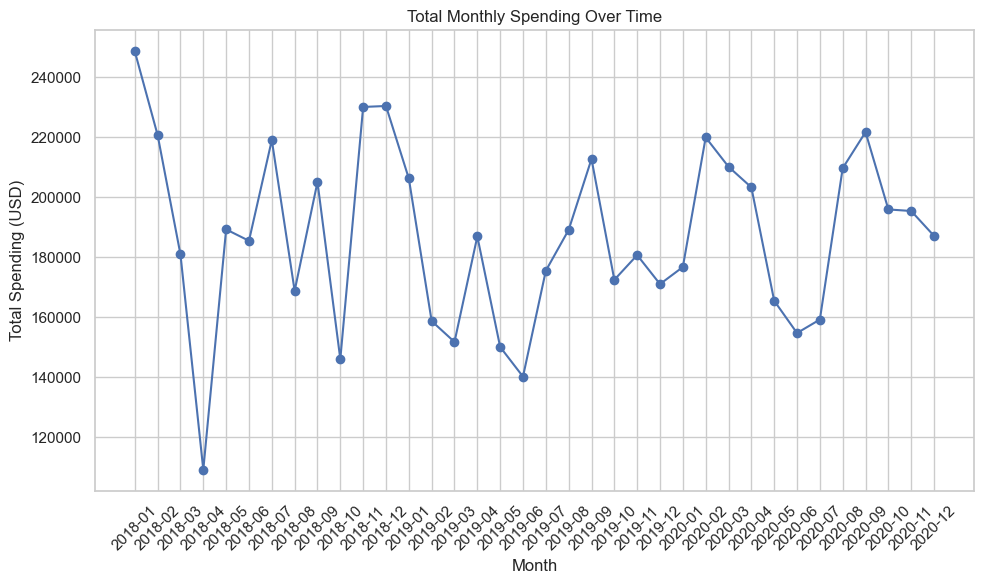

In [10]:
# Trend of Spending Over Time (Total Spend for Each Month)
df_budget['Month'] = pd.to_datetime(df_budget['Date']).dt.to_period('M')
monthly_spending = df_budget.groupby('Month')['Amount_Spent'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_spending['Month'].astype(str), monthly_spending['Amount_Spent'], marker='o')
plt.title('Total Monthly Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

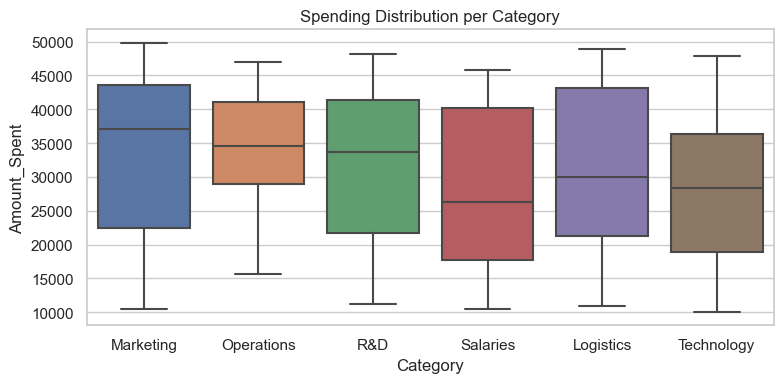

In [11]:
# Boxplot to understand the spread of spending in each category
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_budget, x='Category', y='Amount_Spent')
plt.title('Spending Distribution per Category')
plt.tight_layout()
plt.show()

In [12]:
# Feature Engineering
df_budget['Month_Num'] = df_budget['Date'].apply(lambda x: pd.to_datetime(x).month)  # Extract month number
df_budget['Year'] = df_budget['Date'].apply(lambda x: pd.to_datetime(x).year)  # Extract year

In [13]:
# Encode 'Category' as numerical values
category_mapping = {category: idx for idx, category in enumerate(df_budget['Category'].unique())}
df_budget['Category_Num'] = df_budget['Category'].map(category_mapping)

In [14]:
# Features and Target Variable
X = df_budget[['Month_Num', 'Category_Num', 'Year']]  # Features
y = df_budget['Amount_Spent']  # Target

In [15]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Predictions using Linear Regression
y_pred_lin_reg = lin_reg_model.predict(X_test)

In [17]:
# Evaluate the model (Linear Regression)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)

print(f"Linear Regression Model - RMSE: {rmse_lin_reg}")


Linear Regression Model - RMSE: 12069.550225607753


In [18]:
# Initialize Random Forest Regressor for better accuracy
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)


In [19]:
# Evaluate the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Regressor Model - RMSE: {rmse_rf}")

Random Forest Regressor Model - RMSE: 13785.653061743624


In [20]:
# Simulated predicted outcomes (can be from our Random Forest model predictions)
predicted_spending = rf_model.predict(X)  # Predicted spending values

# Real spending from the dataset
real_spending = df_budget['Amount_Spent']

# Create a new dataframe to compare real vs predicted
comparison_df = pd.DataFrame({
    'Category': df_budget['Category'],
    'Real_Spending': real_spending,
    'Predicted_Spending': predicted_spending
})

# Print comparison table (first few rows)
print(comparison_df.head())

     Category  Real_Spending  Predicted_Spending
0   Marketing          49752            44963.17
1  Operations          20445            30931.77
2         R&D          48212            43994.94
3    Salaries          38052            39177.02
4   Logistics          46384            41223.83


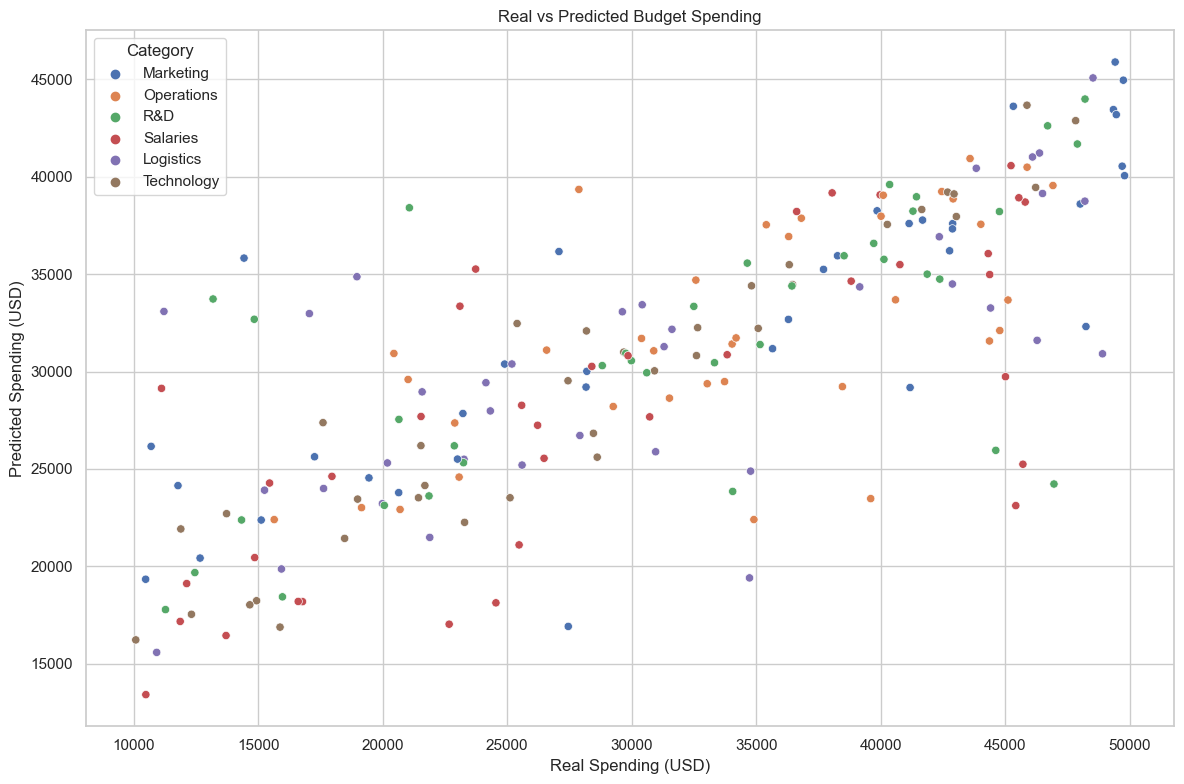

In [21]:
# Plot comparison
plt.figure(figsize=(12, 8))
sns.scatterplot(data=comparison_df, x='Real_Spending', y='Predicted_Spending', hue='Category')
plt.title('Real vs Predicted Budget Spending')
plt.xlabel('Real Spending (USD)')
plt.ylabel('Predicted Spending (USD)')
plt.tight_layout()
plt.show()

In [22]:
 #Calculate RMSE to measure the error
rmse = mean_squared_error(real_spending, predicted_spending, squared=False)
print(f"Root Mean Squared Error (RMSE) between predicted and real spending: {rmse:.2f}")

Root Mean Squared Error (RMSE) between predicted and real spending: 7575.08


In [23]:
pip install deap


Note: you may need to restart the kernel to use updated packages.


In [24]:

from deap import base, creator, tools, algorithms



# Simulated predicted outcomes (these could come from our Random Forest model predictions)
predicted_outcomes = rf_model.predict(X)  # Predicted spending values

# Total available budget for optimization (example: $200,000)
total_budget = 200000

# Real spending (for reference)
real_spending = df_budget['Amount_Spent']

# Set up the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # We want to maximize the spending
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create the individual (solution) - each individual is a list of allocated budget for each category
def create_individual():
    return [random.uniform(0, total_budget) for _ in predicted_outcomes]

# Define the evaluation function
def evaluate(individual):
    # Evaluate the sum of predicted outcomes based on the individual's budget allocation
    predicted_spending = np.dot(individual, predicted_outcomes)  # Linear combination of allocated budget and predicted spending
    total_allocation = sum(individual)  # Total sum of allocated budgets
    
    # Check if the total allocation exceeds the budget
    if total_allocation > total_budget:
        return -1e6,  # Penalize if it exceeds the total budget
    else:
        return predicted_spending,  # Return the predicted spending as the fitness value

# Set up the Genetic Algorithm environment
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)  # Crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)  # Mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection
toolbox.register("evaluate", evaluate)

# Create the initial population
population = toolbox.population(n=50)  # Size of the population

# Run the Genetic Algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, stats=None, verbose=True)

# Get the best individual after the genetic algorithm runs
best_individual = tools.selBest(population, 1)[0]
print("Optimized Budget Allocation (USD):")
for idx, category in enumerate(df_budget['Category'].unique()):
    print(f"{category}: ${best_individual[idx]:,.2f}")


gen	nevals
0  	50    
1  	35    
2  	37    
3  	40    
4  	46    
5  	39    
6  	40    
7  	30    
8  	43    
9  	40    
10 	43    
11 	43    
12 	39    
13 	33    
14 	38    
15 	34    
16 	42    
17 	40    
18 	36    
19 	44    
20 	35    
21 	36    
22 	29    
23 	33    
24 	39    
25 	35    
26 	40    
27 	32    
28 	38    
29 	39    
30 	43    
31 	41    
32 	34    
33 	42    
34 	33    
35 	41    
36 	38    
37 	38    
38 	39    
39 	36    
40 	36    
41 	35    
42 	38    
43 	43    
44 	39    
45 	38    
46 	38    
47 	34    
48 	33    
49 	37    
50 	36    
Optimized Budget Allocation (USD):
Marketing: $85,236.41
Operations: $145,577.16
R&D: $91,651.26
Salaries: $79,945.09
Logistics: $197,660.82
Technology: $149,781.37


In [32]:

# Assuming you have these:
categories = ['Marketing', 'Operations', 'R&D', 'Salaries', 'Logistics', 'Technology']
best_individual = best_individual  # from your GA optimization

# Reshape best_individual to a matrix (Rows = months, Columns = categories)
months = int(len(best_individual) / len(categories))  # Calculate number of months
optimized_matrix = np.array(best_individual).reshape((months, len(categories)))

# Now, sum over months for each category
total_optimized_per_category = optimized_matrix.sum(axis=0)

# Create final DataFrame
optimized_df = pd.DataFrame({
    'Category': categories,
    'Optimized_Budget_USD': total_optimized_per_category
})

# Save to CSV
optimized_df.to_csv('optimized_budget_allocation.csv', index=False)

print("Optimized Budget Allocation saved correctly!")


Optimized Budget Allocation saved correctly!
